In [7]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot  as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [8]:
data = pd.read_csv('cardio_train.csv')
data.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [9]:
data = pd.read_csv('cardio_train.csv',sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# Check for duplicates 
print("{} rows are same".format(data.duplicated().sum()))
# Check for Missing values 
print(f"Missing values are present: {data.isnull().sum().any()}")
print(data.shape)

0 rows are same
Missing values are present: False
(70000, 13)


In [11]:
# Drop ID
data = data.drop(['id'], axis=1)
# Convert Age to years 
# Check rounding
data['age'] = (data['age']/365).round(0)
# Remove height, weight, ap_hi, ap_lo, gluc, smoke, alco, active, BMI
data = data.drop(['weight', 'height','ap_hi', 'ap_lo', 'gluc', 'smoke', 'alco', 'active'], axis=1)
print(data.shape)

(70000, 4)


In [12]:
data.head()

,age,gender,cholesterol,cardio
0,50.0,2,1,0
1,55.0,1,3,1
2,52.0,1,3,1
3,48.0,2,1,1
4,48.0,1,1,0


<AxesSubplot:>

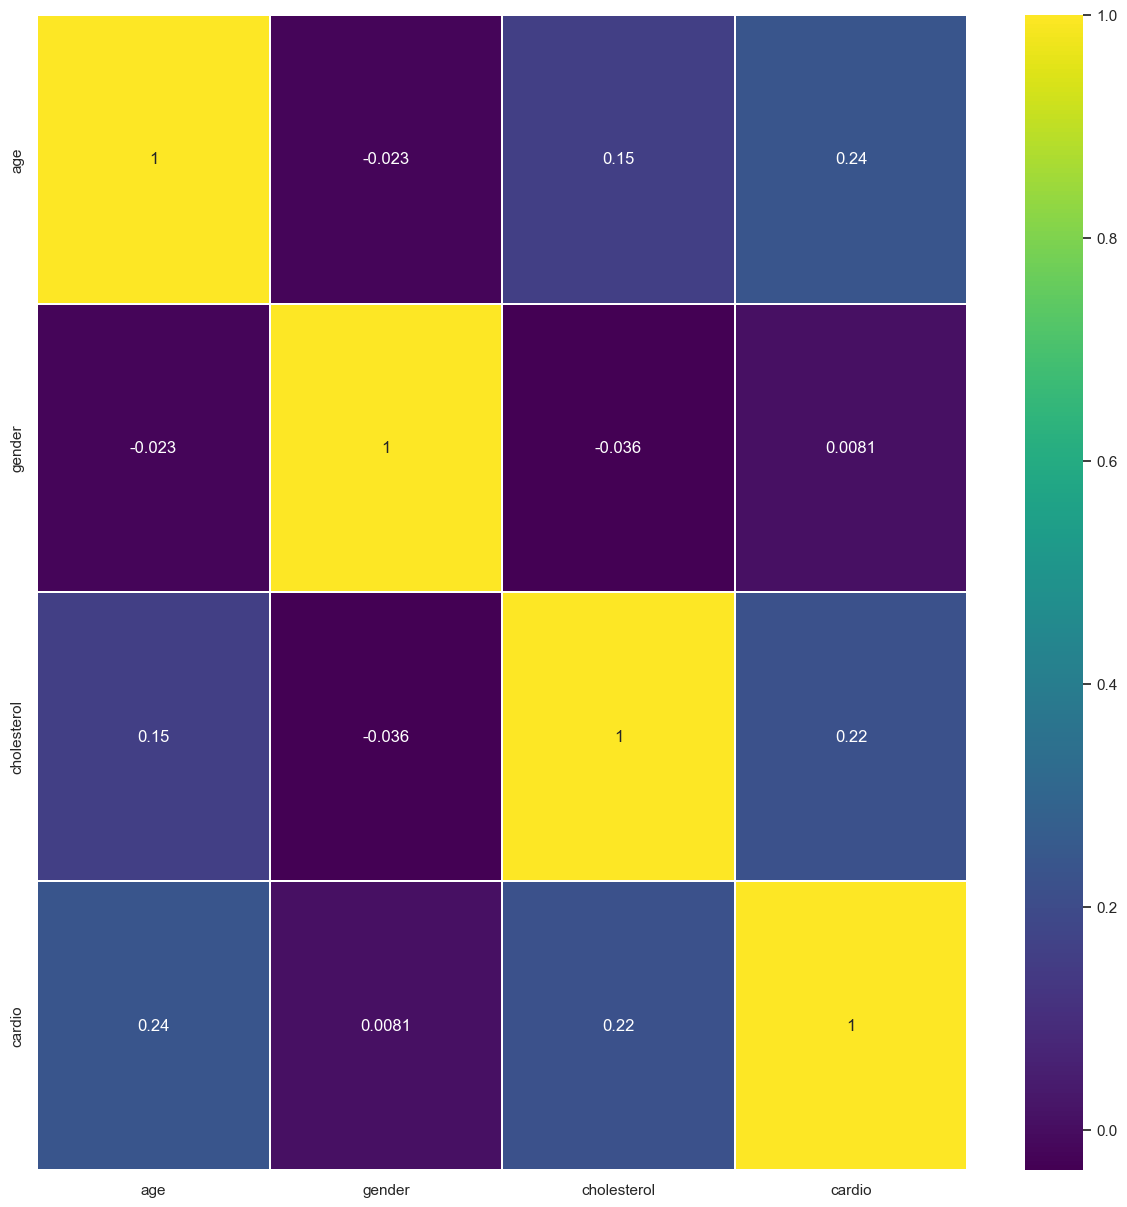

In [13]:
#Correlation Matrix Visualization
corrmat = data.corr()
plt.figure(figsize = (15, 15))
sb.heatmap(corrmat, cmap = 'viridis', annot = True, linewidths = '.25')

C:\Users\ryanc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cholesterol', ylabel='count'>

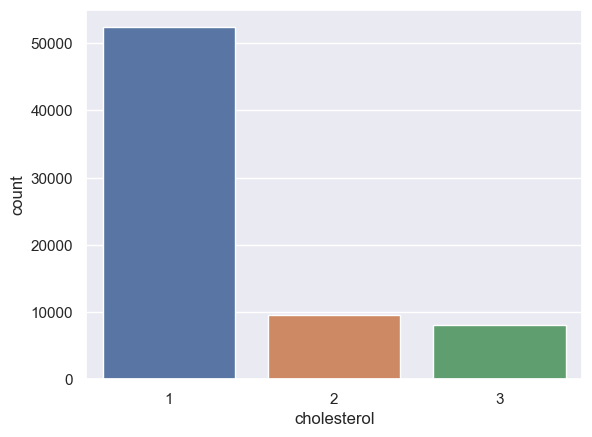

In [14]:
sb.countplot(data['cholesterol'])

In [15]:
# Convert gender to binary values  --> 0 women, 1 men
data["gender"] = data["gender"] % 2
data.head()

,age,gender,cholesterol,cardio
0,50.0,0,1,0
1,55.0,1,3,1
2,52.0,1,3,1
3,48.0,0,1,1
4,48.0,1,1,0


In [16]:
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

C:\Users\ryanc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

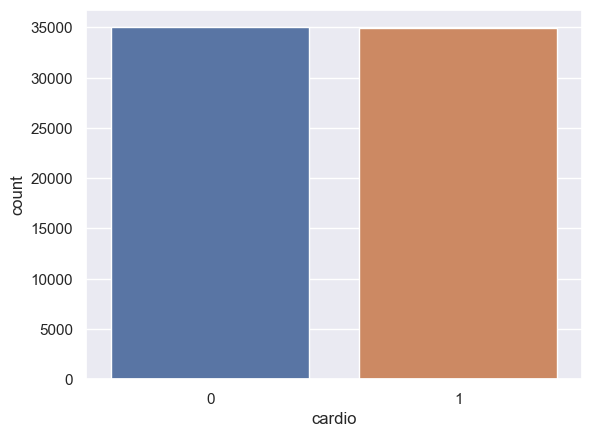

In [17]:
sb.countplot(data['cardio'])

<AxesSubplot:xlabel='age', ylabel='count'>

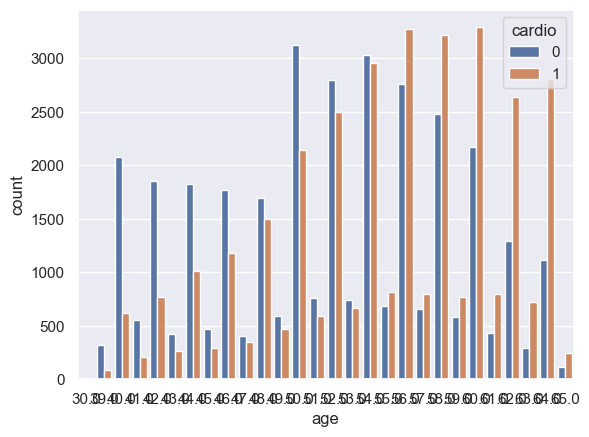

In [18]:
sb.countplot(x='age',hue='cardio',data=data)

<AxesSubplot:xlabel='age', ylabel='count'>

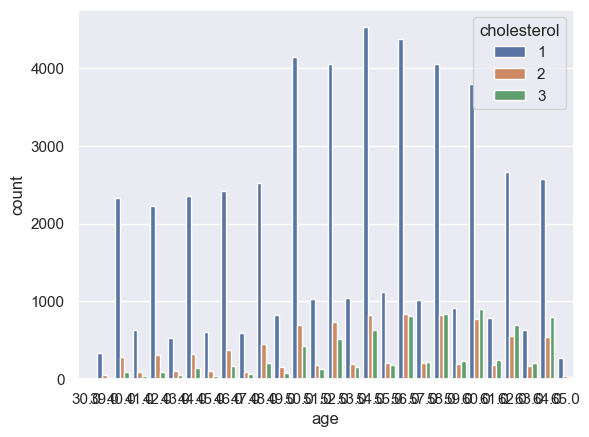

In [19]:
sb.countplot(x='age',hue='cholesterol',data=data)

In [20]:
Age = pd.DataFrame(data['age'])
Cholesterol = pd.DataFrame(data['cholesterol'])
Cardio = pd.DataFrame(data['cardio'])

In [21]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y = pd.DataFrame(data["cardio"])
X = pd.DataFrame(data[["age", "cholesterol"]])

In [22]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (52500, 1) (52500, 2)
Test Set  : (17500, 1) (17500, 2)


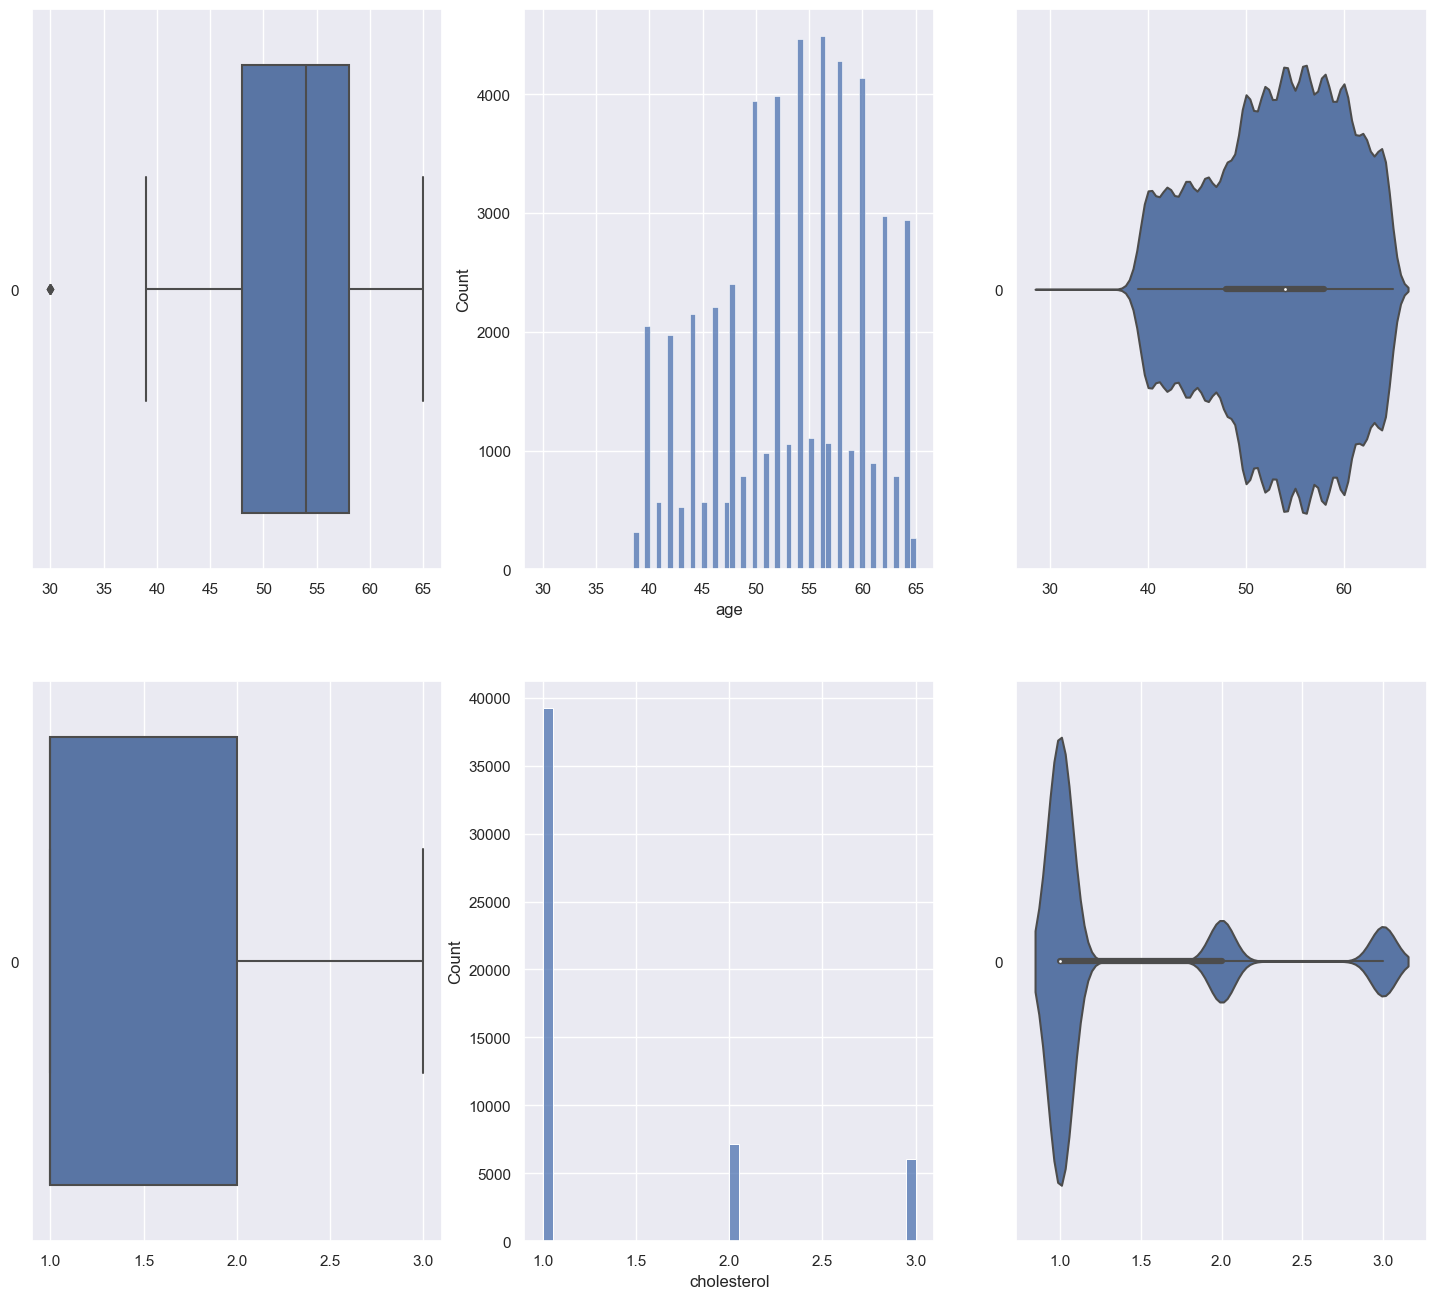

In [23]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(2, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)

C:\Users\ryanc\AppData\Local\Temp\ipykernel_29896\1351284574.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=1000)

In [26]:
rfc.predict(X_test)

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [27]:
rfc.score(X_test,y_test)

0.6263428571428571

In [28]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier()
# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
dectree.predict(X_test)

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [31]:
dectree.score(X_test,y_test)

0.6263428571428571